In [1]:
import os
import cv2

import tensorflow as tf
from tensorflow import keras

In [2]:
model = tf.keras.models.load_model('./models/fast_scnn.keras', safe_mode=False)

# Show the model architecture
model.summary()


Model: "Fast_SCNN"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 512, 1024, 3)]       0         []                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 256, 512, 32)         896       ['input_layer[0][0]']         
                                                                                                  
 batch_normalization_36 (Ba  (None, 256, 512, 32)         128       ['conv2d_26[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu (ReLU)                (None, 256, 512, 32)         0         ['batch_normalization_

In [3]:
import numpy as np
# from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

image = cv2.imread('./data/testImages/test3.jpg', 1)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (1024, 512))
image = Image.fromarray(image)
image = np.array(image)
 

(1, 512, 1024, 3)
1/1 [==============================] - 0s 361ms/step


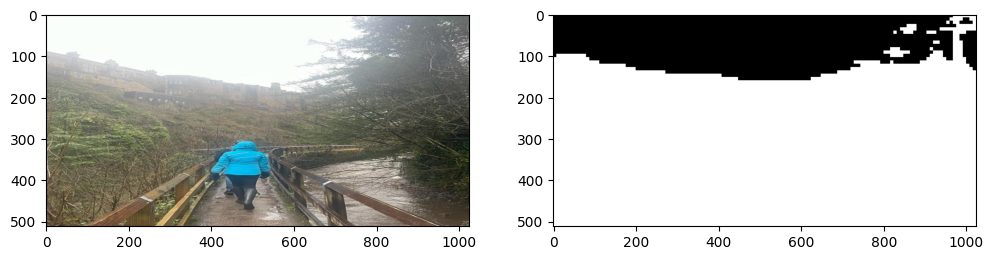

In [4]:
import matplotlib.pyplot as plt
import random

# maskes prediction from test image
test_img = image
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = model.predict(test_img_input)
mask = np.array(prediction[0][:,:,0])

# turns prediction into mask of 1's and 0's
def classify(x):
  if x >= 0.5:
    return 255
  else:
    return 0

vectorizeClassify = np.vectorize(classify)
mask = vectorizeClassify(mask)


plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(test_img)
plt.subplot(122)
plt.imshow(mask, cmap="gray")
plt.show()
               

In [5]:
img = cv2.resize(mask.astype(np.uint8),(768, 1024))
img = Image.fromarray(img, 'L')
img.show()


In [6]:
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, './model')

/Users/willmoran/Documents/solarPanelApp/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
